In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data_path = os.path.join(os.getcwd(), '../data', 'regression_part1.csv')
time_exam = pd.read_csv(data_path, delimiter = ',')

In [3]:
time = time_exam['revision_time']
exam = time_exam['exam_score']

print(time_exam.describe())
print(time_exam.shape)
print(time.dtype)
print(exam.dtype)

       revision_time  exam_score
count      50.000000   50.000000
mean       22.220020   49.919860
std        13.986112   20.925594
min         2.723000   14.731000
25%         8.570500   32.125000
50%        21.688000   47.830500
75%        32.257500   65.069750
max        48.011000   94.945000
(50, 2)
float64
float64


In [4]:
time = np.array(time)[:, np.newaxis]
y_true = np.array(exam)[:, np.newaxis]

poly = PolynomialFeatures(degree=1)
X = poly.fit_transform(time)

In [5]:
reg_sk = LinearRegression(fit_intercept=False)
model_sk = reg_sk.fit(X, y_true)
y_sk = model_sk.predict(X)
w_sk = reg_sk.coef_
w_sk

array([[17.89768026,  1.44114091]])

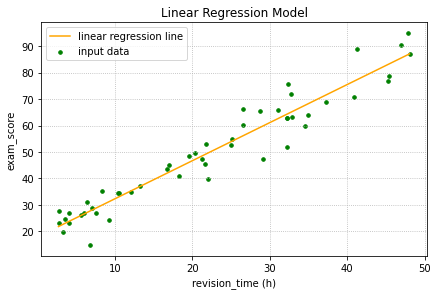

In [6]:
plt.title('Linear Regression Model')
plt.grid(linestyle=':')

plt.scatter(time, y_true, s=50, marker='.', c='green', label='input data')
plt.plot(time, y_sk, c='orange', label='linear regression line')
plt.tight_layout()
plt.legend()

plt.xlabel('revision_time (h)')
plt.ylabel('exam_score')
plt.show()

In [7]:
w_me = (np.matrix((X.T).dot(X)).I).dot(X.T).dot(y_true)
y_me = X.dot(w_me)

mse_me = mean_squared_error(y_true, y_me)
mse_me

30.98547261454129

In [8]:
mse_sk = mean_squared_error(y_true, y_sk)
mse_sk

30.9854726145413

In [9]:
w0 = np.full((100,1), 20)
w1 = np.linspace(-2, 2, 100)[:, np.newaxis]
w = np.concatenate((w0, w1), axis=1)

In [10]:
mse_w = []
for i in range(100):
    y_w = X.dot(w[i])
    mse_w.append(mean_squared_error(y_true, y_w))
    
min_mse = min(mse_w)
print(min_mse)
print(w1[mse_w.index(min_mse)])

32.48096161535148
[1.35353535]


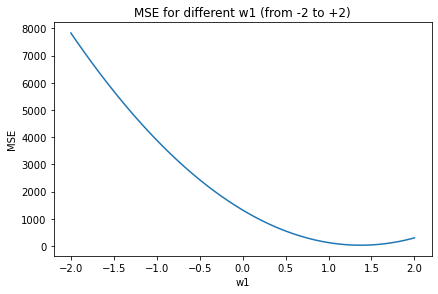

In [11]:
plt.title("MSE for different w1 (from -2 to +2)")
plt.plot(w1, mse_w)
plt.tight_layout()

plt.xlabel('w1')
plt.ylabel('MSE')
plt.show()